## Task 1

### Implement the Apriori algorithm to analyse the Disease Symptom dataset, identifying common combinations of symptoms that frequently co-occur within the same disease profile.

### Approach:
- Data Exploration:
    - Load and explore the dataset structure and composition 
    - Understand the schema
        - Identify the distribution of diseases and symptoms
        - Visualize symptom frequency and disease prevalence
- Item set generation:
    - Tag the disease together with its symptoms as a singular item set
    - Perform a count of these disease-symptom itemsets


In [70]:
import os

os.chdir('..')
from global_functions import *
os.chdir('Task_1/')

In [71]:

import pandas as pd
import matplotlib.pyplot as plt

In [72]:
os.chdir('..')
disease_df = load_data_as_df()
os.chdir('Task_1/')
disease_df


Successfully loaded data from RawData/dataset.csv
DataFrame shape: (4920, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
disease_df['Disease'].nunique()

41

In [74]:
disease_df.groupby('Disease').count()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
Disease,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0
AIDS,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Acne,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,120,120,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0
Allergy,120,120,120,72,0,0,0,0,0,0,0,0,0,0,0,0,0
Arthritis,120,120,120,120,90,0,0,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,120,120,120,120,120,72,0,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,120,120,120,120,78,0,0,0,0,0,0,0,0,0,0,0,0
Chicken pox,120,120,120,120,120,120,120,120,120,120,66,0,0,0,0,0,0


#### As we can see, every disease has a healthy number of datapoints (120). So, no mirroring is required at this stage.

### We will perform Apiori on each disease profile individually as running each disease (120 lines) against the global (~5000 lines) dataset renders everything infrequent.

### Grouping diseases together with their symptoms

In [75]:
from pprint import pprint
disease_dataset = {}
for disease, group in disease_df.groupby('Disease'):
    # Build list of symptom sets per reported case
    transactions = group.iloc[:, 1:].apply(lambda row: [s for s in row if pd.notna(s)], axis=1).tolist()
    # For each disease, represent all transactions in a dataframe
    disease_dataset[disease] = pd.DataFrame.from_records(transactions)
pprint(disease_dataset['(vertigo) Paroymsal  Positional Vertigo'])

             0          1                    2                    3  \
0     vomiting   headache               nausea   spinning_movements   
1     vomiting   headache               nausea   spinning_movements   
2     headache     nausea   spinning_movements      loss_of_balance   
3     vomiting     nausea   spinning_movements      loss_of_balance   
4     vomiting   headache   spinning_movements      loss_of_balance   
..         ...        ...                  ...                  ...   
115   vomiting   headache               nausea   spinning_movements   
116   vomiting   headache               nausea   spinning_movements   
117   vomiting   headache               nausea   spinning_movements   
118   vomiting   headache               nausea   spinning_movements   
119   vomiting   headache               nausea   spinning_movements   

                    4              5  
0     loss_of_balance   unsteadiness  
1     loss_of_balance   unsteadiness  
2        unsteadiness         

### We will identify a select few diseases to apply our algorithm on

This is to avoid long run-times and combinatorial explosions resulting from diseases with a lot of unique symptoms (E.g: "Common Cold")

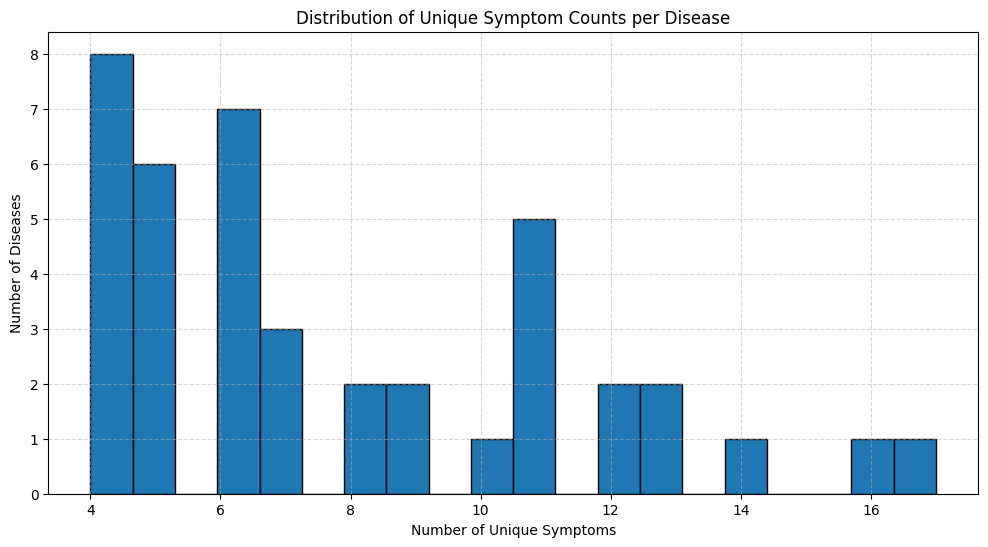

In [76]:
unique_symptom_counts = {}

for disease, group in disease_df.groupby('Disease'):
    # Flatten all symptom columns into a single list
    all_symptoms = pd.Series(group.iloc[:, 1:].values.ravel())
    # Drop NaN and count unique
    unique_count = all_symptoms.dropna().nunique()
    unique_symptom_counts[disease] = unique_count

# Convert to a DataFrame for sorting and plotting
symptom_count_df = pd.DataFrame(list(unique_symptom_counts.items()), columns=['Disease', 'Unique_Symptom_Count'])
symptom_count_df = symptom_count_df.sort_values(by='Unique_Symptom_Count', ascending=False)

plt.figure(figsize=(12,6))
plt.hist(symptom_count_df['Unique_Symptom_Count'], bins=20, edgecolor='black')
plt.title('Distribution of Unique Symptom Counts per Disease')
plt.xlabel('Number of Unique Symptoms')
plt.ylabel('Number of Diseases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the code above, let us look at diseases with less than 8 unique symptoms.

In [77]:
# Display top and bottom diseases
print("=== Diseases with 8-10 unique symptoms ===")
final_diseases_df = symptom_count_df[symptom_count_df["Unique_Symptom_Count"] <= 8].head(5)
final_diseases_df

=== Diseases with 8-10 unique symptoms ===


,Disease,Unique_Symptom_Count
28,Jaundice,8
29,Malaria,8
9,Chronic cholestasis,7
39,Varicose veins,7
3,Alcoholic hepatitis,7


### Applying Apiori Algorithm on dataset

In [78]:
from apriori import Apriori

In [79]:
# Initialize Apriori
apriori = Apriori(min_support=0.6, min_confidence=0.4)
all_freq_results = []
all_rule_results = []

scoped_diseases = final_diseases_df['Disease'].tolist()

for disease, transactions in disease_dataset.items():
    if disease in scoped_diseases:
        print(f'==============={disease}==================')
        apriori.load_data(transactions)

        # Find frequent itemsets
        frequent_itemsets = apriori.find_frequent_itemsets()

        for size, itemsets in frequent_itemsets.items():
            for itemset in itemsets:
                all_freq_results.append({
                    'disease': disease,
                    'itemset_size': size,
                    'itemset': ', '.join([apriori.idx_to_item[idx] for idx in itemset]),
                    'support': apriori.calculate_support(itemset)
                })
                
        # Generate association rules
        association_rules = apriori.generate_association_rules()

        for rule in association_rules:
            all_rule_results.append({
                'disease': disease,
                'antecedent': ', '.join(list(rule['antecedent'])),
                'consequent': ', '.join(list(rule['consequent'])),
                'support': round(rule['support'], 3),
                'confidence': round(rule['confidence'], 3)
            })

freq_df = pd.DataFrame(all_freq_results)
rules_df = pd.DataFrame(all_rule_results)

freq_df.to_csv('disease_frequent_itemsets.csv', index=False)
rules_df.to_csv('disease_association_rules.csv', index=False)

print("Saved frequent itemsets and association rules to CSV.")


===============Alcoholic hepatitis==================
Loaded 120 transactions with 7 unique items.
Finding frequent itemsets...
Found 7 frequent 1-itemsets
Found 42 frequent 2-itemsets
Found 70 frequent 3-itemsets
Found 70 frequent 4-itemsets
Found 42 frequent 5-itemsets
Found 14 frequent 6-itemsets
Found 2 frequent 7-itemsets
Found 0 frequent 8-itemsets
Frequent itemset mining completed in 0.01 seconds
Generating association rules...
Association rules completed in 0.06 seconds
Generated 3864 rules
===============Chronic cholestasis==================
Loaded 120 transactions with 7 unique items.
Finding frequent itemsets...
Found 7 frequent 1-itemsets
Found 42 frequent 2-itemsets
Found 70 frequent 3-itemsets
Found 70 frequent 4-itemsets
Found 42 frequent 5-itemsets
Found 14 frequent 6-itemsets
Found 2 frequent 7-itemsets
Found 0 frequent 8-itemsets
Frequent itemset mining completed in 0.00 seconds
Generating association rules...
Association rules completed in 0.04 seconds
Generated 3864 

## With this, let us visualise the most frequent symptoms for each disease, and look for the longest frequent itemsets

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load frequent itemsets
freq_df = pd.read_csv("disease_frequent_itemsets.csv", names=["disease", "itemset_size", "item", "support"])
freq_df

,disease,itemset_size,item,support
0,disease,itemset_size,itemset,support
1,Alcoholic hepatitis,1,abdominal_pain,0.95
2,Alcoholic hepatitis,1,distention_of_abdomen,0.95
3,Alcoholic hepatitis,1,fluid_overload,0.95
4,Alcoholic hepatitis,1,history_of_alcohol_consumption,0.95
...,...,...,...,...
1741,Varicose veins,6,"cramps, fatigue, obesity, prominent_veins_on_calf, swollen_blood_vessels, swollen_legs",0.65
1742,Varicose veins,6,"bruising, cramps, obesity, prominent_veins_on_calf, swollen_blood_vessels, swollen_legs",0.65
1743,Varicose veins,6,"bruising, fatigue, obesity, prominent_veins_on_calf, swollen_blood_vessels, swollen_legs",0.65
1744,Varicose veins,7,"bruising, cramps, fatigue, obesity, prominent_veins_on_calf, swollen_blood_vessels, swollen_legs",0.6


In [81]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

max_itemset_per_disease = (
    freq_df.groupby("disease")["itemset_size"].max().reset_index()
)

merged = pd.merge(freq_df, max_itemset_per_disease, on=["disease", "itemset_size"], how="inner")

merged = merged.sort_values(["disease", "itemset_size", "support"], ascending=[True, False, False])
merged = merged.drop_duplicates("disease", keep="first")
merged = merged.iloc[:-1]
print(merged)

               disease itemset_size  \
1  Alcoholic hepatitis            7   
3  Chronic cholestasis            7   
5             Jaundice            8   
7              Malaria            8   
9       Varicose veins            7   

                                                                                                                                          item  \
1   abdominal_pain,  distention_of_abdomen,  fluid_overload,  history_of_alcohol_consumption,  swelling_of_stomach,  vomiting,  yellowish_skin   
3                                          abdominal_pain,  loss_of_appetite,  nausea,  vomiting,  yellowing_of_eyes,  yellowish_skin, itching   
5                                        abdominal_pain,  dark_urine,  fatigue,  high_fever,  vomiting,  weight_loss,  yellowish_skin, itching   
7                                                      chills,  diarrhoea,  headache,  high_fever,  muscle_pain,  nausea,  sweating,  vomiting   
9                                  